In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
colors = ['#494BD3', '#E28AE2', '#F1F481', '#79DB80', '#DF5F5F',
              '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']
colors2 = ['#2D2926', '#E50914']
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm


In [2]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [3]:
data_df = pd.read_csv('titles.csv',error_bad_lines=False, index_col=False)
data_df.head()

C:\Users\LAP12988-local\AppData\Local\Temp\ipykernel_2456\3652010998.py:1: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.





,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [4]:
len(data_df)

5850

In [5]:
num_rows,num_cols=data_df.shape
print('Dữ liệu bao gồm: {} dòng và {} cột'.format(num_rows,num_cols))

Dữ liệu bao gồm: 5850 dòng và 15 cột


In [6]:
have_duplicated_rows=data_df.duplicated().any()
print(have_duplicated_rows)

False


In [7]:
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [8]:
col_dtypes=data_df.dtypes
print(col_dtypes)

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object


In [9]:
def open_object_dtype(s):
    df=pd.Series(s)
    a=df.apply(lambda x : type(x)).unique()
    dtypes = set(a)
    return dtypes

In [10]:
objects_key=(data_df.loc[:, data_df.dtypes == object]).keys()
print("numer of object columns:",len(objects_key))
for key in objects_key:
    print("types of ",key," is ",open_object_dtype(data_df[key]))

numer of object columns: 8
types of  id  is  {<class 'str'>}
types of  title  is  {<class 'str'>, <class 'float'>}
types of  type  is  {<class 'str'>}
types of  description  is  {<class 'str'>, <class 'float'>}
types of  age_certification  is  {<class 'str'>, <class 'float'>}
types of  genres  is  {<class 'str'>}
types of  production_countries  is  {<class 'str'>}
types of  imdb_id  is  {<class 'str'>, <class 'float'>}


In [11]:
data_df[['title','description','age_certification','imdb_id']]

,title,description,age_certification,imdb_id
0,Five Came Back: The Reference Films,This collection includes 12 World War II-era p...,TV-MA,NaN
1,Taxi Driver,A mentally unstable Vietnam War veteran works ...,R,tt0075314
2,Deliverance,Intent on seeing the Cahulawassee River before...,R,tt0068473
3,Monty Python and the Holy Grail,"King Arthur, accompanied by his squire, recrui...",PG,tt0071853
4,The Dirty Dozen,12 American military prisoners in World War II...,NaN,tt0061578
...,...,...,...,...
5845,Fine Wine,A beautiful love story that can happen between...,NaN,tt13857480
5846,C/O Kaadhal,A heart warming film that explores the concept...,NaN,tt11803618
5847,Lokillo,A controversial TV host and comedian who has b...,NaN,tt14585902
5848,Dad Stop Embarrassing Me - The Afterparty,"Jamie Foxx, David Alan Grier and more from the...",PG-13,NaN


In [12]:
data_df['title']=data_df['title'].astype('string')
data_df['description']=data_df['description'].astype('string')
data_df['age_certification']=data_df['age_certification'].astype('string')
data_df['id']=data_df['id'].astype('string')
data_df['type']=data_df['type'].astype('string')
data_df['genres']=data_df['genres'].astype('string')
data_df['production_countries']=data_df['production_countries'].astype('string')
data_df['imdb_id']=data_df['imdb_id'].astype('string')

In [13]:
data_df[['title','description','age_certification','imdb_id','id','type','genres','production_countries']]

,title,description,age_certification,imdb_id,id,type,genres,production_countries
0,Five Came Back: The Reference Films,This collection includes 12 World War II-era p...,TV-MA,<NA>,ts300399,SHOW,['documentation'],['US']
1,Taxi Driver,A mentally unstable Vietnam War veteran works ...,R,tt0075314,tm84618,MOVIE,"['drama', 'crime']",['US']
2,Deliverance,Intent on seeing the Cahulawassee River before...,R,tt0068473,tm154986,MOVIE,"['drama', 'action', 'thriller', 'european']",['US']
3,Monty Python and the Holy Grail,"King Arthur, accompanied by his squire, recrui...",PG,tt0071853,tm127384,MOVIE,"['fantasy', 'action', 'comedy']",['GB']
4,The Dirty Dozen,12 American military prisoners in World War II...,<NA>,tt0061578,tm120801,MOVIE,"['war', 'action']","['GB', 'US']"
...,...,...,...,...,...,...,...,...
5845,Fine Wine,A beautiful love story that can happen between...,<NA>,tt13857480,tm1014599,MOVIE,"['romance', 'drama']",['NG']
5846,C/O Kaadhal,A heart warming film that explores the concept...,<NA>,tt11803618,tm898842,MOVIE,['drama'],[]
5847,Lokillo,A controversial TV host and comedian who has b...,<NA>,tt14585902,tm1059008,MOVIE,['comedy'],['CO']
5848,Dad Stop Embarrassing Me - The Afterparty,"Jamie Foxx, David Alan Grier and more from the...",PG-13,<NA>,tm1035612,MOVIE,[],['US']


In [14]:
col_dtypes=data_df.dtypes
print(col_dtypes)

id                       string
title                    string
type                     string
description              string
release_year              int64
age_certification        string
runtime                   int64
genres                   string
production_countries     string
seasons                 float64
imdb_id                  string
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object


In [16]:
print("Shape of the dataset: ", data_df.shape)
print("_______________________________________")
print("Number of null values: ")
print(data_df.isnull().sum().sort_values(ascending=False))
print("_______________________________________")
print("Number of unique values: ")
print(data_df.nunique().sort_values(ascending=False))

Shape of the dataset:  (5850, 15)
_______________________________________
Number of null values: 
seasons                 3744
age_certification       2619
imdb_votes               498
imdb_score               482
imdb_id                  403
tmdb_score               311
tmdb_popularity           91
description               18
title                      1
id                         0
type                       0
release_year               0
runtime                    0
genres                     0
production_countries       0
dtype: int64
_______________________________________
Number of unique values: 
id                      5850
description             5829
title                   5798
imdb_id                 5447
tmdb_popularity         4889
imdb_votes              3880
genres                  1726
production_countries     452
tmdb_score               394
runtime                  202
imdb_score                80
release_year              63
seasons                   26
age_certifi

In [17]:
print("% of null values: ")
for i in data_df.columns:
    if data_df[i].isnull().any():
        print(i,"---------",data_df[i].isnull().sum()*100/data_df.shape[0],"%")
print("_______________________________________")
print("% of unique values: ")
for i in data_df.columns:
        print(i,"---------",data_df[i].nunique()*100/data_df.shape[0],"%")

% of null values: 
title --------- 0.017094017094017096 %
description --------- 0.3076923076923077 %
age_certification --------- 44.76923076923077 %
seasons --------- 64.0 %
imdb_id --------- 6.888888888888889 %
imdb_score --------- 8.239316239316238 %
imdb_votes --------- 8.512820512820513 %
tmdb_popularity --------- 1.5555555555555556 %
tmdb_score --------- 5.316239316239316 %
_______________________________________
% of unique values: 
id --------- 100.0 %
title --------- 99.11111111111111 %
type --------- 0.03418803418803419 %
description --------- 99.64102564102564 %
release_year --------- 1.0769230769230769 %
age_certification --------- 0.18803418803418803 %
runtime --------- 3.452991452991453 %
genres --------- 29.504273504273506 %
production_countries --------- 7.726495726495727 %
seasons --------- 0.4444444444444444 %
imdb_id --------- 93.11111111111111 %
imdb_score --------- 1.3675213675213675 %
imdb_votes --------- 66.32478632478633 %
tmdb_popularity --------- 83.57264957264

In [18]:
def missing_ratio(s):
    return s.isna().mean() * 100
def num_diff_vals(s):
    return s.dropna().nunique()

def diff_vals(s):
    return s.dropna().unique()

In [19]:
cate_cols=['id','title','type','description', 'age_certification','genres','production_countries','imdb_id']
numeric_cols=list(set(data_df.keys())-set(cate_cols))

In [20]:
index=['missing_ratio', 'num_diff_vals', 'diff_vals']
cate_col_profiles_df=pd.DataFrame(
     index=index,
     columns=cate_cols)
data_cate_col_df = data_df[cate_cols]
cate_col_profiles_df = data_cate_col_df.agg([missing_ratio,num_diff_vals,diff_vals])

print(cate_col_profiles_df)

                                                              id  \
missing_ratio                                                0.0   
num_diff_vals                                               5850   
diff_vals      [ts300399, tm84618, tm154986, tm127384, tm1208...   

                                                           title  \
missing_ratio                                           0.017094   
num_diff_vals                                               5798   
diff_vals      [Five Came Back: The Reference Films, Taxi Dri...   

                        type  \
missing_ratio            0.0   
num_diff_vals              2   
diff_vals      [SHOW, MOVIE]   

                                                     description  \
missing_ratio                                           0.307692   
num_diff_vals                                               5829   
diff_vals      [This collection includes 12 World War II-era ...   

                                               age_c

In [21]:
cate_cols=['id','title','type','description', 'age_certification','genres','production_countries','imdb_id']
numeric_cols=list(set(data_df.keys())-set(cate_cols))

In [22]:
nume_col_profiles_df=pd.DataFrame(index=['missing_ratio','min','max'],
                                  columns=numeric_cols)

nume_col_profiles_df.loc['missing_ratio',numeric_cols]=np.float64(data_df[numeric_cols].isna().mean()*100)

nume_col_profiles_df.loc['min',numeric_cols]=np.float64(data_df[numeric_cols].min())

nume_col_profiles_df.loc['max',numeric_cols]=np.float64(data_df[numeric_cols].max())

nume_col_profiles_df=nume_col_profiles_df.astype(np.float64)


print(nume_col_profiles_df)

               runtime  tmdb_popularity  seasons    imdb_votes  imdb_score  \
missing_ratio      0.0         1.555556     64.0  8.512821e+00    8.239316   
min                0.0         0.009442      1.0  5.000000e+00    1.500000   
max              240.0      2274.044000     42.0  2.294231e+06    9.600000   

               tmdb_score  release_year  
missing_ratio    5.316239           0.0  
min              0.500000        1945.0  
max             10.000000        2022.0  


In [23]:
data_df.describe().T.style.set_properties(**{"background-color": "#FBA7A7", "font-size" : "17px",
                                        "color": "#ffffff", "border-radius" : "1px", "border": "1.5px solid black"})

,count,mean,std,min,25%,50%,75%,max
release_year,5850.000000,2016.417094,6.937726,1945.000000,2016.000000,2018.000000,2020.000000,2022.000000
runtime,5850.000000,76.888889,39.002509,0.000000,44.000000,83.000000,104.000000,240.000000
seasons,2106.000000,2.162868,2.689041,1.000000,1.000000,1.000000,2.000000,42.000000
imdb_score,5368.000000,6.510861,1.163826,1.500000,5.800000,6.600000,7.300000,9.600000
imdb_votes,5352.000000,23439.382474,95820.470909,5.000000,516.750000,2233.500000,9494.000000,2294231.000000
tmdb_popularity,5759.000000,22.637925,81.680263,0.009442,2.728500,6.821000,16.590000,2274.044000
tmdb_score,5539.000000,6.829175,1.170391,0.500000,6.100000,6.900000,7.537500,10.000000


In [24]:
data_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,<NA>,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,<NA>,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,<NA>,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,<NA>,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,<NA>,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,<NA>,NaN,NaN,1.296,10.000


In [218]:
list_type_count=data_df["type"].value_counts().tolist()
print(list_type_count)
total=sum(list_type_count)
for i in range (len(list_type_count)):
    list_type_count[i]=list_type_count[i]/total*100
list_type_count

[3744, 2106]


[64.0, 36.0]

In [227]:
print(list_type_count.sort())

None


In [29]:
def count_plot(dataframe,index,col_name,axes):
    #print(col_name)
    list_type_count=data_df[col_name].value_counts().tolist()
    list_type_count.sort(reverse=True)
    total=sum(list_type_count)
    for i in range (len(list_type_count)):
        temp=list_type_count[i]
        list_type_count[i]=str(temp)+":"+str(round(list_type_count[i]/total*100,1))+'%'
    ax=sns.countplot(data=data_df,ax=axes[index], x = col_name,palette = colors2,order = data_df[col_name].value_counts().index)
    ax.bar_label(container=ax.containers[0], labels= list_type_count)
    

In [30]:
cat_cols=['type', 'age_certification']


type
age_certification


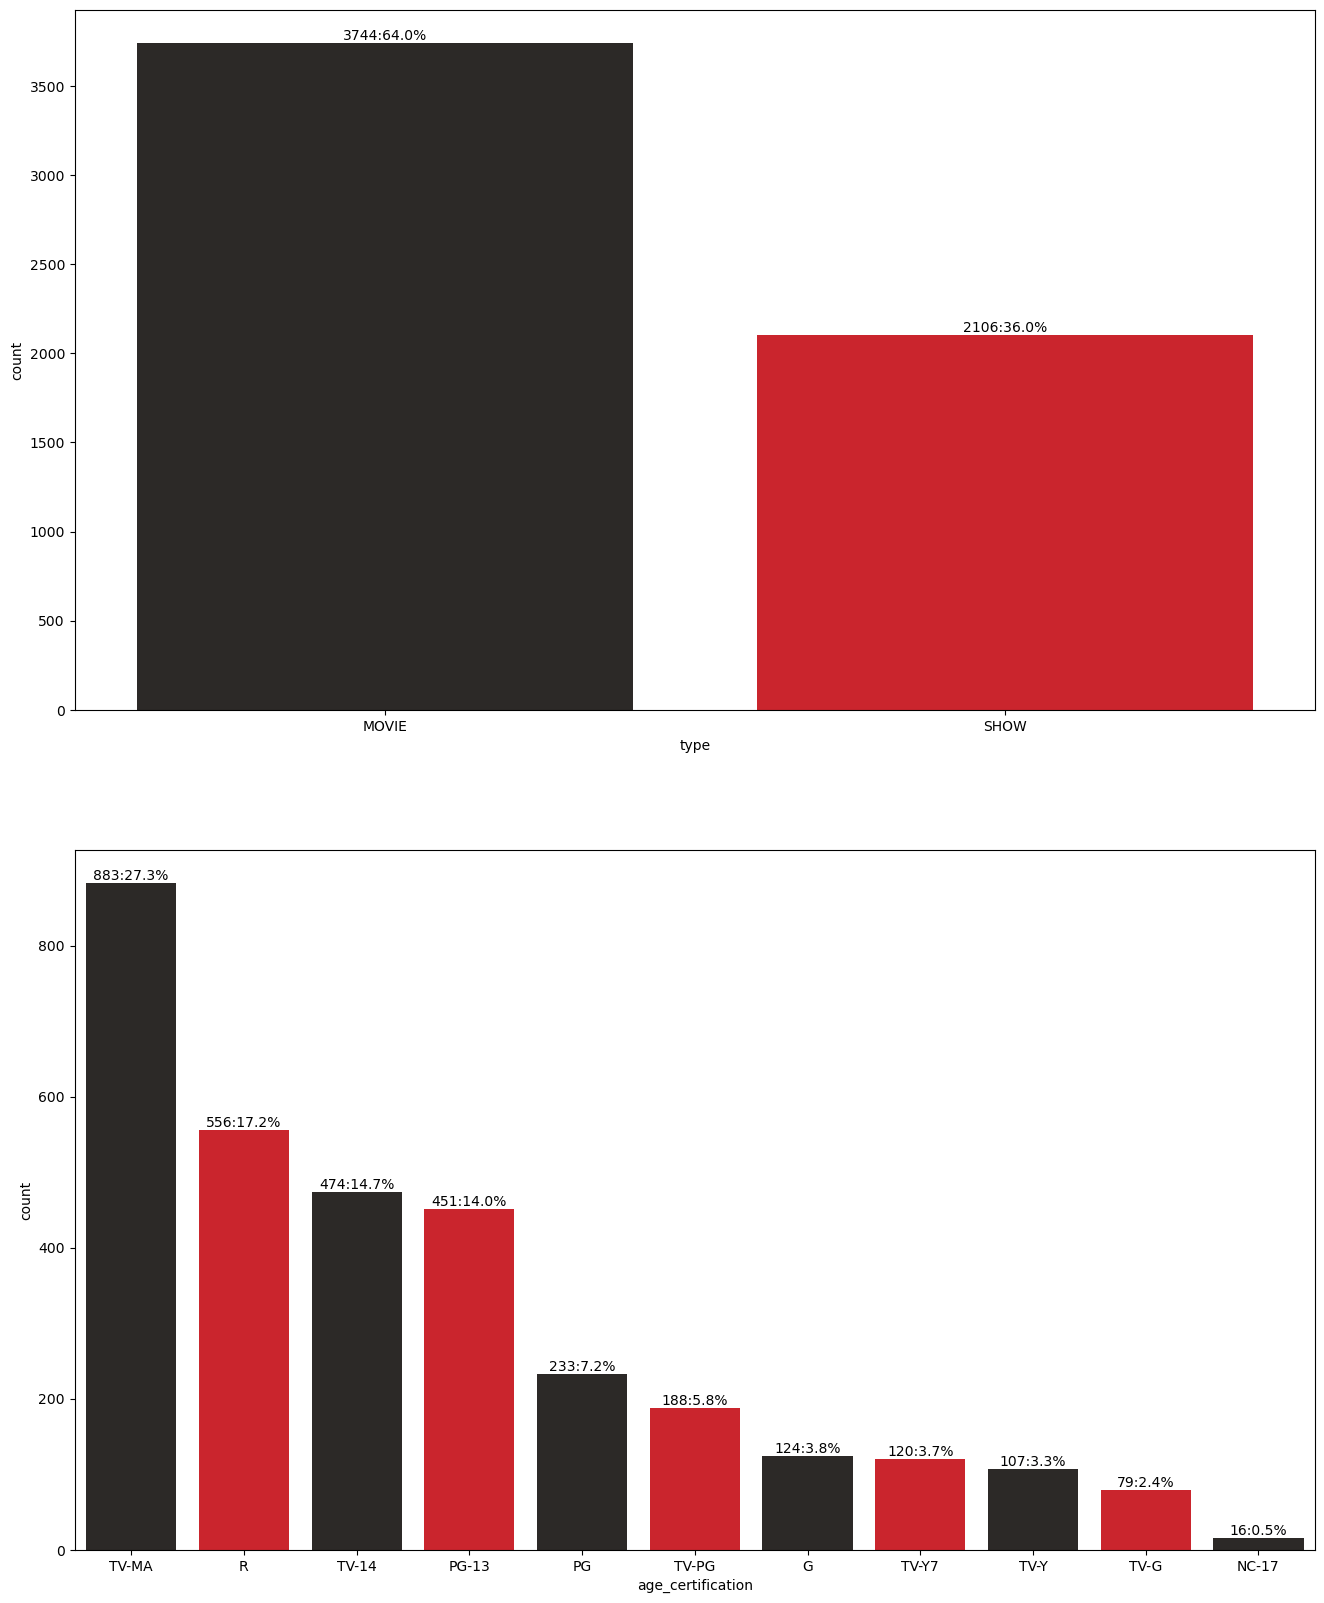

In [32]:
fig,axes = plt.subplots(nrows = 2, ncols = 1, figsize = (16,20))
i=0
for col_name in cat_cols:
    #print(col_name)
    count_plot(data_df,i,col_name,axes)
    i=i+1
plt.show()

In [33]:
print('Number of Unique Values of duration for Movie : ', len(data_df[data_df['type'] == "MOVIE"]['runtime'].unique()))
print('Number of Unique Values of duration for TV Show : ', len(data_df[data_df['type'] == "SHOW"]['runtime'].unique()))

Number of Unique Values of duration for Movie :  197
Number of Unique Values of duration for TV Show :  95


In [34]:
l1 = []
for i in tqdm(data_df['runtime']):
       num = (i / 10)//1
       l1.append( str(num) + ' - ' + str(num + 1))
#data_df[data_df['type'] == "MOVIE"]=l1
data_df.insert(loc = 8, column = 'mins movie', value = l1)
data_df.head()

100%|██████████████████████████████████████████████████████████████████████████| 5850/5850 [00:00<00:00, 733971.83it/s]


,id,title,type,description,release_year,age_certification,runtime,genres,mins movie,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],5.0 - 6.0,['US'],1.0,<NA>,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",11.0 - 12.0,['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",10.0 - 11.0,['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",9.0 - 10.0,['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,<NA>,150,"['war', 'action']",15.0 - 16.0,"['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


C:\Users\LAP12988-local\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\LAP12988-local\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



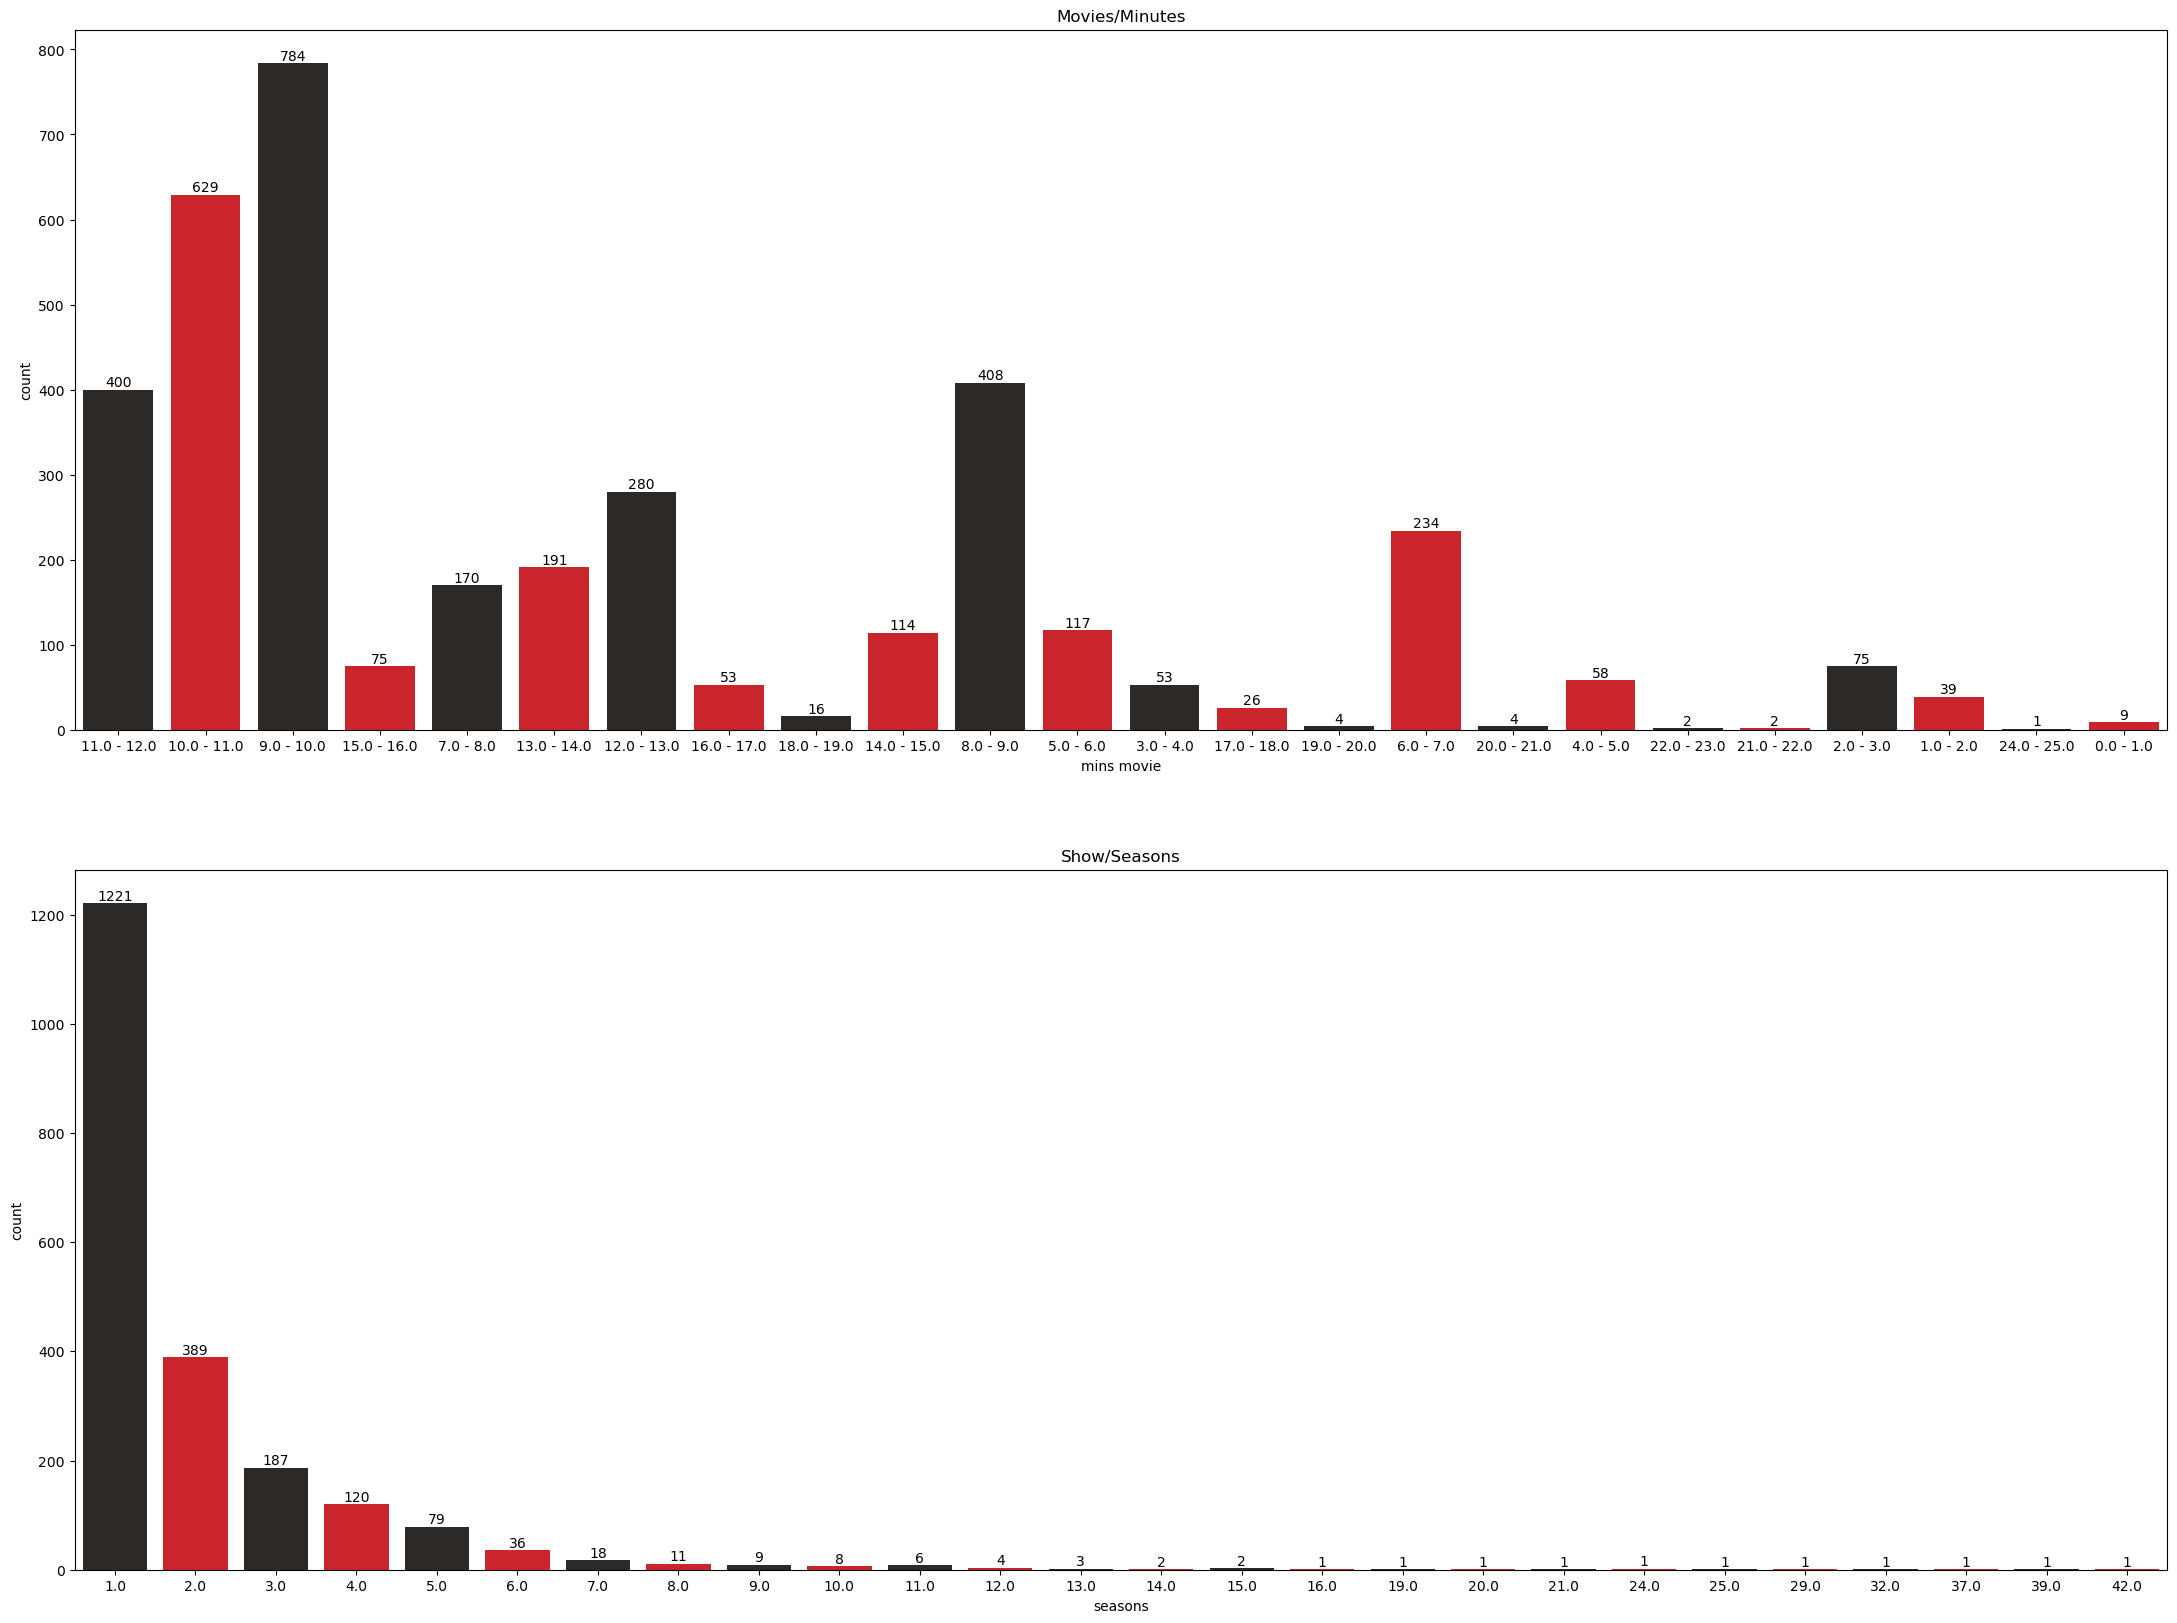

In [35]:
fig = plt.subplots(nrows = 2, ncols = 1, figsize = (27,20))

plt.subplot(2,1,1)
ax = sns.countplot('mins movie',data = data_df.loc[(data_df['type'] == "MOVIE")],palette = colors2)
plt.title('Movies/Minutes');
ax.bar_label(container=ax.containers[0], labels= data_df[(data_df['type'] == "MOVIE")].value_counts().values)

plt.subplot(2,1,2)
ax = sns.countplot('seasons', data = data_df.loc[data_df['type'] == "SHOW"],palette = colors2)
plt.title('Show/Seasons')
ax.bar_label(container=ax.containers[0], labels= data_df["seasons"][(data_df['type'] == "SHOW")].value_counts().values)

plt.show()

C:\Users\LAP12988-local\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\LAP12988-local\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



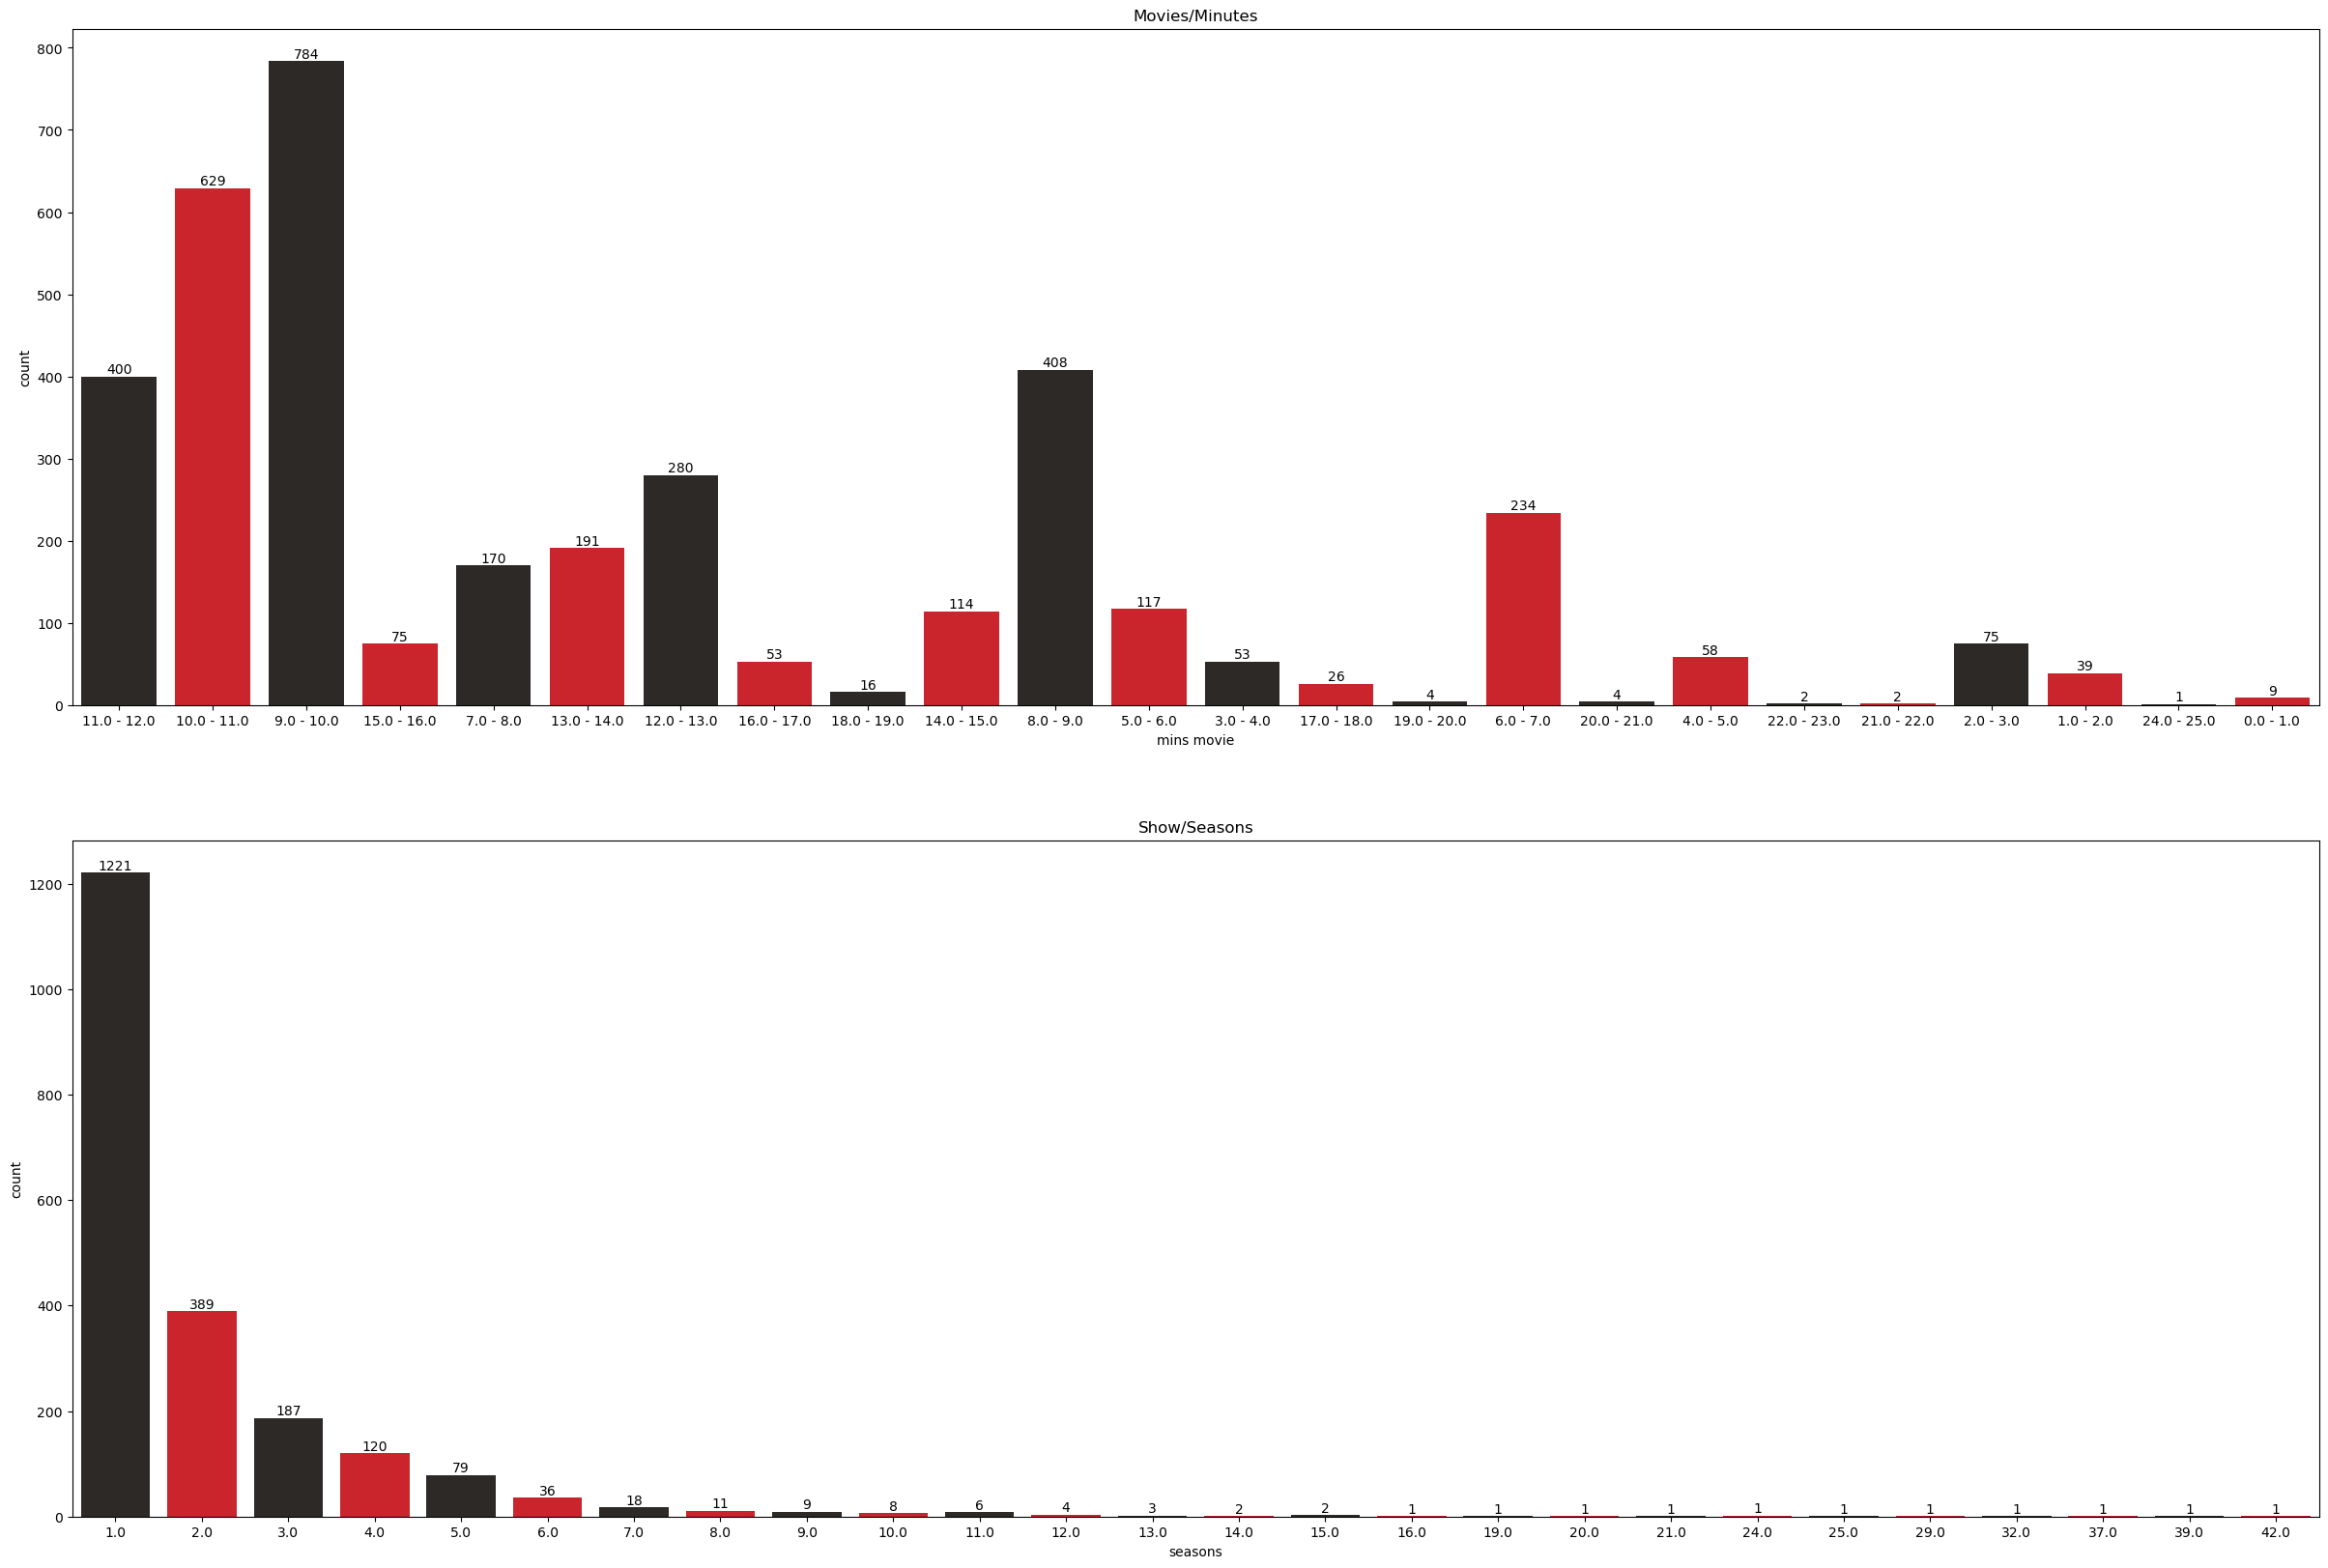

In [36]:
fig = plt.subplots(nrows = 2, ncols = 1, figsize = (30,20))

plt.subplot(2,1,1)
ax = sns.countplot('mins movie',data = data_df.loc[(data_df['type'] == "MOVIE")],palette = colors2)
plt.title('Movies/Minutes');
ax.bar_label(container=ax.containers[0], labels= data_df[(data_df['type'] == "MOVIE")].value_counts().values)

plt.subplot(2,1,2)
ax = sns.countplot('seasons', data = data_df.loc[data_df['type'] == "SHOW"],palette = colors2)
plt.title('Show/Seasons')
ax.bar_label(container=ax.containers[0], labels= data_df["seasons"][(data_df['type'] == "SHOW")].value_counts().values)


plt.show()

In [37]:
numeric_cols=list(set(data_df.keys())-set(cate_cols))

In [38]:
num_cols=["tmdb_score","release_year","imdb_score"]

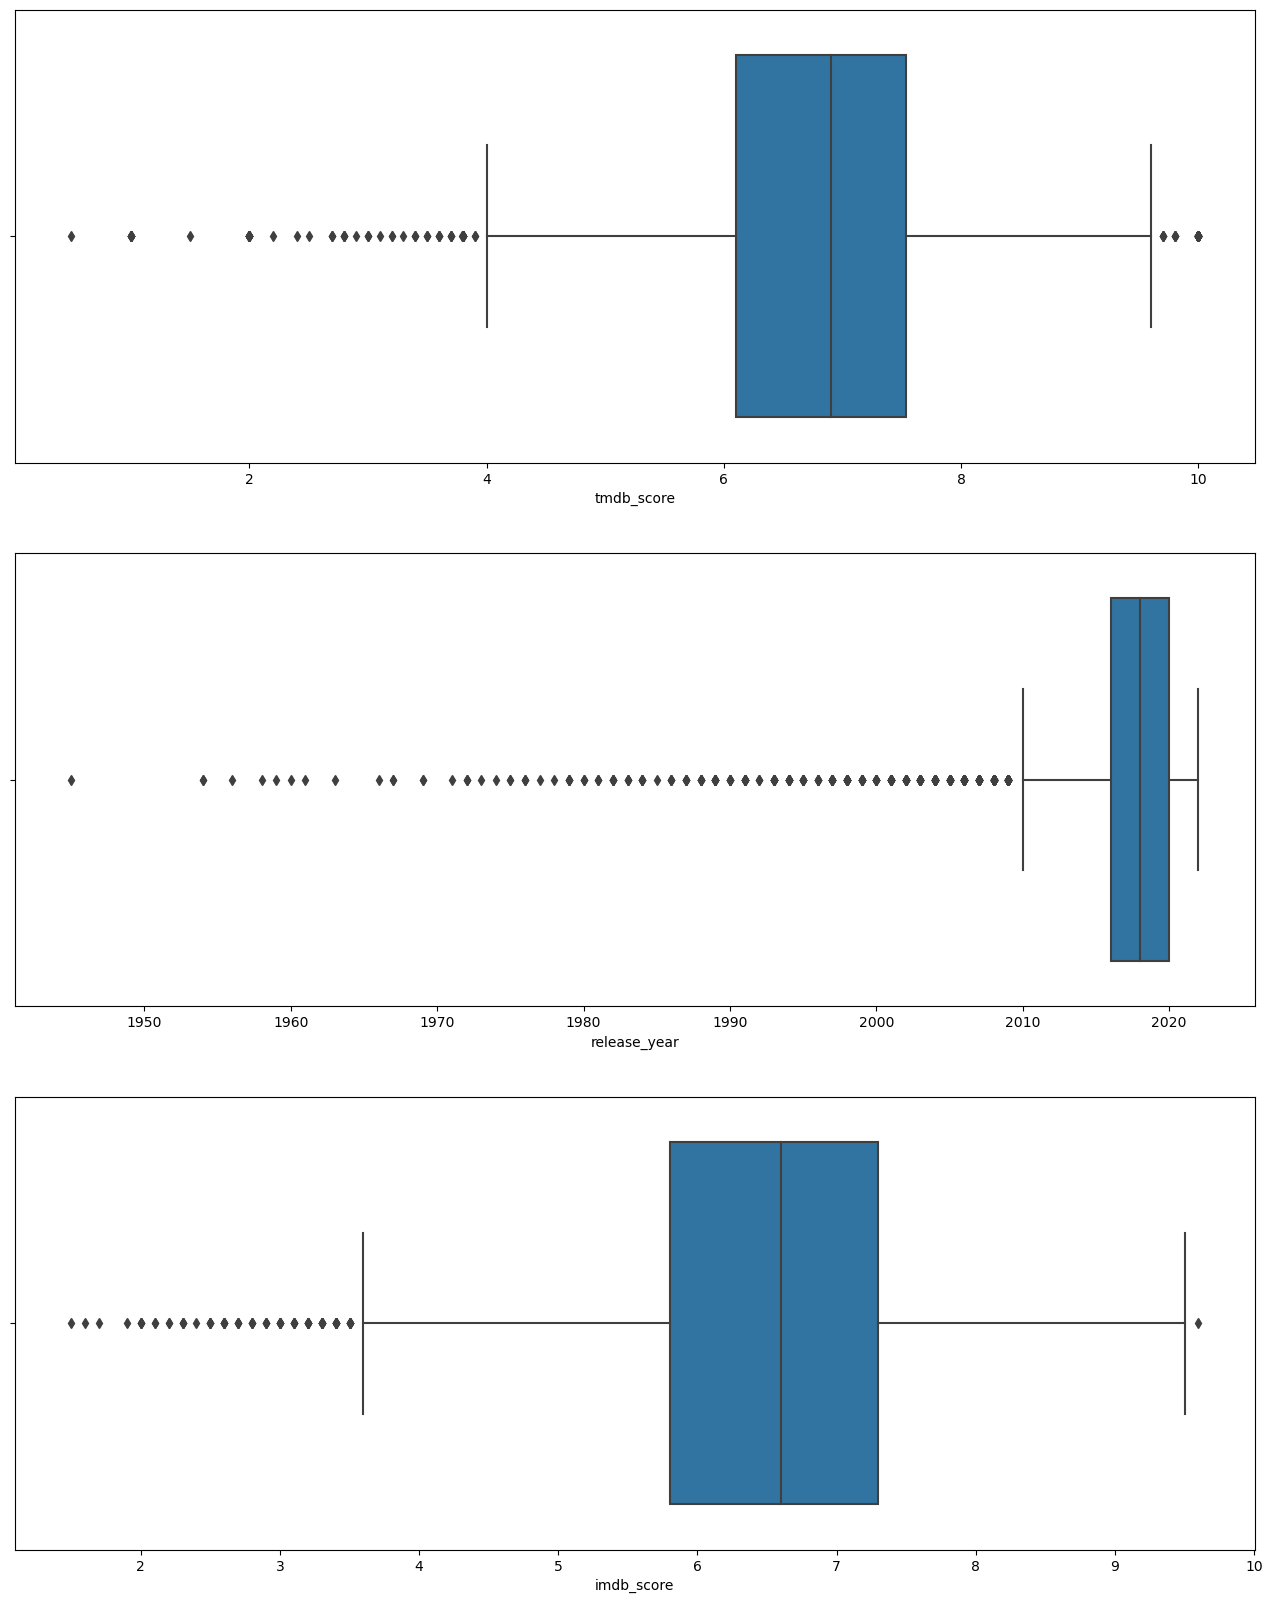

In [39]:
i=0
#j=0
rows=3
cols=1
fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize = (16,20))
for col in num_cols:
    sns.boxplot(ax=axes[i],data=data_df,x=col)
    i=i+1
plt.show()


                 release_year   runtime   seasons  imdb_score  imdb_votes  \
release_year         1.000000 -0.173551 -0.504407   -0.129380   -0.208815   
runtime             -0.173551  1.000000 -0.139642   -0.148068    0.139760   
seasons             -0.504407 -0.139642  1.000000    0.106806    0.206079   
imdb_score          -0.129380 -0.148068  0.106806    1.000000    0.190661   
imdb_votes          -0.208815  0.139760  0.206079    0.190661    1.000000   
tmdb_popularity      0.043244  0.002545  0.168051    0.017675    0.209763   
tmdb_score           0.032073 -0.277454  0.044023    0.570754    0.112960   

                 tmdb_popularity  tmdb_score  
release_year            0.043244    0.032073  
runtime                 0.002545   -0.277454  
seasons                 0.168051    0.044023  
imdb_score              0.017675    0.570754  
imdb_votes              0.209763    0.112960  
tmdb_popularity         1.000000    0.071894  
tmdb_score              0.071894    1.000000  


C:\Users\LAP12988-local\AppData\Local\Temp\ipykernel_2456\1814094179.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\LAP12988-local\AppData\Local\Temp\ipykernel_2456\1814094179.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot:>

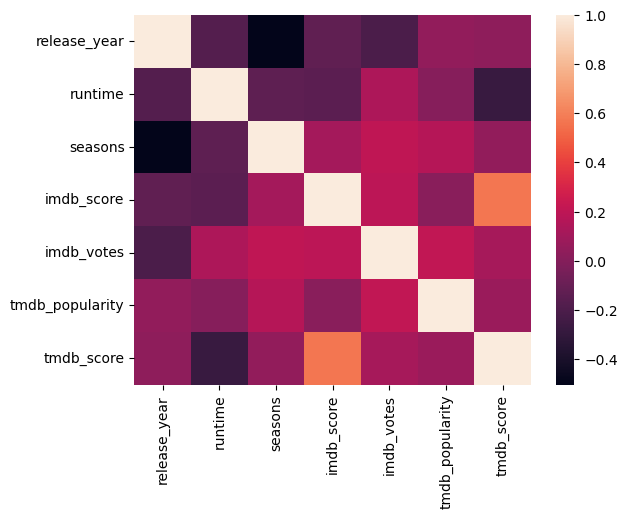

In [40]:
print(data_df.corr())
sns.heatmap(data_df.corr(),data=data_df)

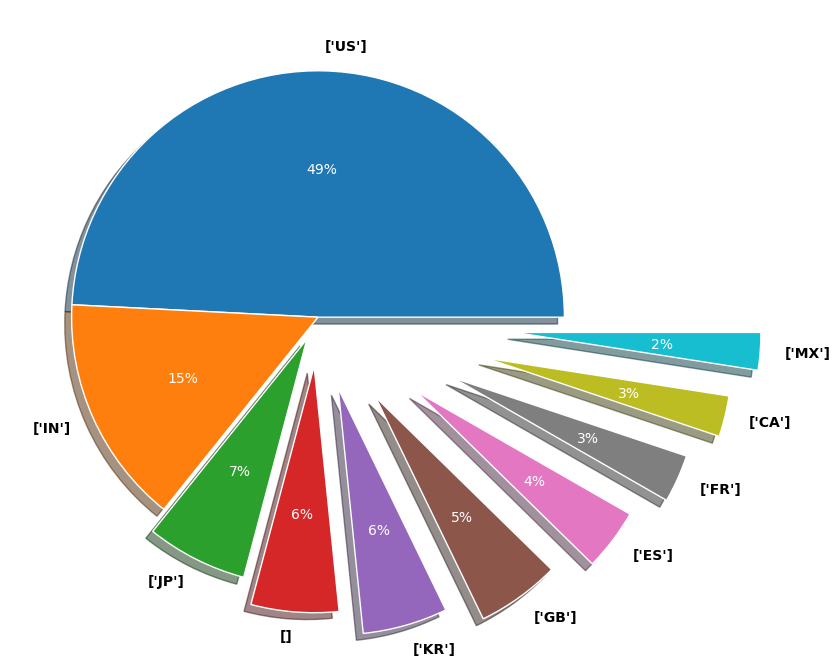

In [57]:
plt.figure(figsize=(8,8))
patches, texts, pcts=plt.pie(data_df["production_countries"].value_counts().head(10),labels=data_df["production_countries"].value_counts().head(10).index,
        autopct="%0.0f%%",shadow=True,explode=[0,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8],wedgeprops={'edgecolor': 'white'});
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
plt.show()

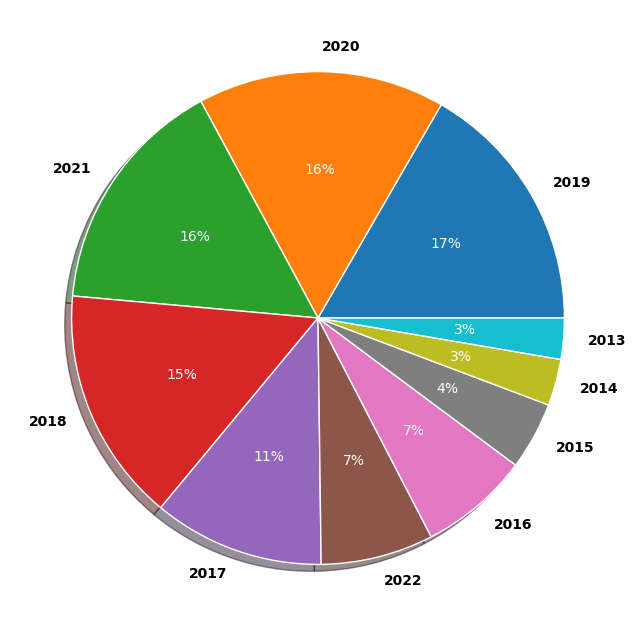

In [60]:
plt.figure(figsize=(8,8))
patches, texts, pcts=plt.pie(data_df["release_year"].value_counts().head(10),labels=data_df["release_year"].value_counts().head(10).index,
        autopct="%0.0f%%",shadow=True,wedgeprops={'edgecolor': 'white'});
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
plt.show()

In [44]:
data_df["production_countries"].value_counts()

['US']                1959
['IN']                 599
['JP']                 264
[]                     229
['KR']                 222
                      ... 
['GR', 'GB', 'US']       1
['CL', 'PE']             1
['CA', 'CN', 'US']       1
['SG', 'US']             1
['PH', 'FO']             1
Name: production_countries, Length: 452, dtype: Int64

In [42]:
data_df

,id,title,type,description,release_year,age_certification,runtime,genres,mins movie,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],5.0 - 6.0,['US'],1.0,<NA>,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",11.0 - 12.0,['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",10.0 - 11.0,['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",9.0 - 10.0,['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,<NA>,150,"['war', 'action']",15.0 - 16.0,"['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,<NA>,100,"['romance', 'drama']",10.0 - 11.0,['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,<NA>,134,['drama'],13.0 - 14.0,[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,<NA>,90,['comedy'],9.0 - 10.0,['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],3.0 - 4.0,['US'],NaN,<NA>,NaN,NaN,1.296,10.000


In [58]:
data_df["production_countries"].value_counts().head(10).index

Index(['['US']', '['IN']', '['JP']', '[]', '['KR']', '['GB']', '['ES']',
       '['FR']', '['CA']', '['MX']'],
      dtype='string')

In [79]:
data_groupby=data_df.groupby('age_certification')['imdb_score'].apply(lambda x: (x>6).sum()).reset_index(name='count')
data_groupby=data_groupby.sort_values(by=['count'],ascending=False)

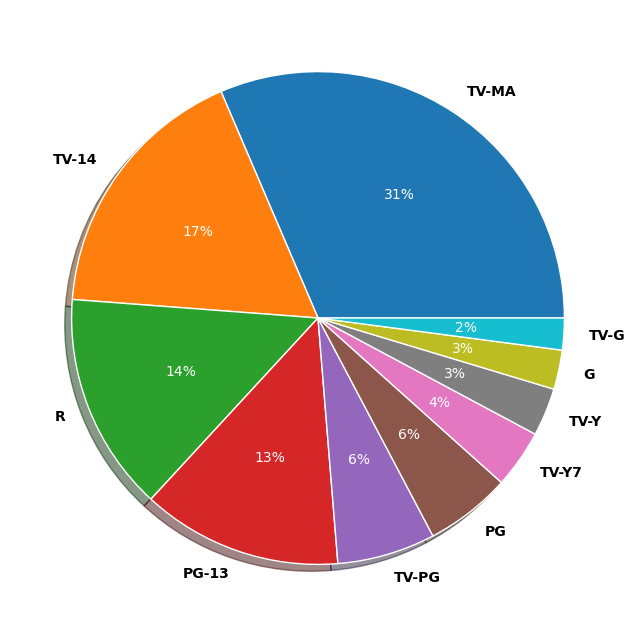

In [80]:
plt.figure(figsize=(8,8))
patches, texts, pcts=plt.pie(data_groupby["count"].head(10),labels=data_groupby["age_certification"].head(10).value_counts().index,
        autopct="%0.0f%%",shadow=True,wedgeprops={'edgecolor': 'white'});
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
plt.show()

In [78]:
data_groupby["count"].head(10)

0     58
1      9
2    127
3    296
4    323
5    391
6     47
7    708
8    145
9     71
Name: count, dtype: int64